cost after  0 iteration is :  0.6931471805599452
cost after  100000 iteration is :  0.5982155271897898
cost after  200000 iteration is :  0.5692110693361248
cost after  300000 iteration is :  0.543556847115452
cost after  400000 iteration is :  0.52109102013368
cost after  500000 iteration is :  0.5016397572563842
cost after  600000 iteration is :  0.4882417314116691
cost after  700000 iteration is :  0.4825343136862611
cost after  800000 iteration is :  0.4780637126471032
cost after  900000 iteration is :  0.47452687477379646
cost after  0 iteration is :  0.6931471805599452
cost after  1000 iteration is :  0.6376350073626477
cost after  2000 iteration is :  0.634789031554501
cost after  3000 iteration is :  0.6328026771643557
cost after  4000 iteration is :  0.63138042100373
cost after  5000 iteration is :  0.6303342493117386
cost after  6000 iteration is :  0.629535620394026
cost after  7000 iteration is :  0.6288985785037514
cost after  8000 iteration is :  0.6283665444689872
cost a

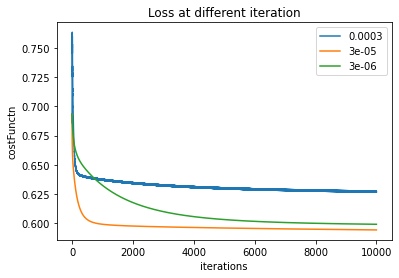

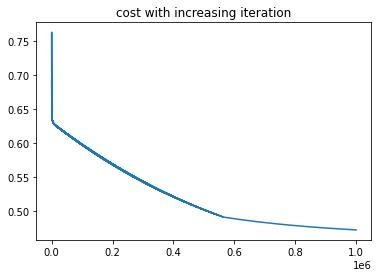

Train data
Accuracy:  77.61 %
Test data
Accuracy:  73.38 %
Validation data
Accuracy:  77.92 %


In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mp
from matplotlib import pyplot as plt


#Reading the data of the file
filename="diabetes.csv"
Data=pd.read_csv(filename)

#Checking the data of diabetes file
#Data.head()
#print(Data)
#Data.shape


#for x  and y values  refing the data to get the features and outcome
x=pd.DataFrame(Data.iloc[:,:-1])
y=pd.DataFrame(Data.iloc[:,-1:])
Data["Outcome"].value_counts()

#Taking only values of data excluding the names
x=x.values
y=y.values


#Taking standard scaler of independent variable x
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)


#Importing train_test_split function from sklearns to split data into train, test and validation.
from sklearn.model_selection import train_test_split
Dia_x_train,Dia_x_rem,Dia_y_train,Dia_y_rem=train_test_split(x,y,train_size=0.6,random_state=1)
Dia_x_valid,Dia_x_test,Dia_y_valid,Dia_y_test=train_test_split(Dia_x_rem,Dia_y_rem, test_size=0.5,random_state=1)



#Changing the shape of variable according to  for train, test and validation data 
Dia_x_train=Dia_x_train.T
Dia_x_rem=Dia_x_rem.T
Dia_x_test=Dia_x_test.T
Dia_x_valid=Dia_x_valid.T
Dia_y_train = Dia_y_train.reshape(1, Dia_x_train.shape[1])
Dia_y_test = Dia_y_test.reshape(1, Dia_x_test.shape[1])
Dia_y_rem = Dia_y_rem.reshape(1, Dia_x_rem.shape[1])
Dia_y_valid = Dia_y_valid.reshape(1, Dia_x_valid.shape[1])



#Defining sigmoid function
def sig(z):
    return (1/(1+np.exp(-z)))


#Defining COST function  to calculate cost 
def costF(Dia_x_train,Dia_y_train , learning_rate, iterations):
    
    m = Dia_x_train.shape[1]
    n = Dia_x_train.shape[0]
    
    
    #print(m)
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        z=np.dot(W.T, Dia_x_train) +B
        A = sig(z)
        cost=-(1/m)*(np.sum( Dia_y_train*np.log(A) + (1-Dia_y_train)*np.log(1-A)))
        
        dW=(1/m)*np.dot(A-Dia_y_train,Dia_x_train.T)  
        dB=(1/m)*np.sum(A-Dia_y_train)
        
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list
        

#Calculate graph for different iteration.
def graph(Dia_x_train, Dia_y_train):
    ilist=[.0003,.00003,.000003]
    for i in ilist:
        W, B, costFunctn = costF(Dia_x_train, Dia_y_train, i, iterations = 10000)
        plt.plot(np.squeeze(costFunctn),label = str(i))
    plt.ylabel('costFunctn')
    plt.xlabel('iterations')
    plt.title('Loss at different iteration')
    plt.legend()
    plt.show()
        

#Calling cost function
iterations = 1000000
learning_R = 0.0003

W, B, costFunctn = costF(Dia_x_train, Dia_y_train, learning_R, iterations)

graph(Dia_x_train, Dia_y_train)


plt.plot(np.arange(iterations), costFunctn)
plt.title('cost with increasing iteration')
plt.show()

#costFvalid =costF(Dia_x_valid,Dia_y_train, learning_R = learning_R, iterations= iterations)




#To calculate of the train , test and valid data accuracy
def accuracy_data(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sig(Z)
    m =  np.shape(A)[1]

    for i in range (m) :
        if(A[0][i]>0.5):
            A[0][i]=1
        else:
            A[0][i]=0
            
    A = np.array(A, dtype = 'int64')
    a = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    print("Accuracy: ", round(a, 2), "%")
    
    
    
    
    
print("Train data")
accuracy_data(Dia_x_train, Dia_y_train, W, B)
print("Test data")
accuracy_data(Dia_x_test, Dia_y_test, W, B)
print("Validation data")
accuracy_data(Dia_x_valid, Dia_y_valid, W, B)    


